In [14]:
import torch 
import torchaudio
import IPython
import matplotlib.pyplot as plt

torch.random.manual_seed(0)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(f'Torch: {torch.__version__}')
print(f'Torchaudio: {torchaudio.__version__}')
print(f'Device: {device}')

Torch: 1.13.1+cpu
Torchaudio: 0.13.1+cpu
Device: cpu


In [20]:
bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

processor = bundle.get_text_processor()
tacotron2 = bundle.get_tacotron2().to(device)
vocoder = bundle.get_vocoder().to(device)

text = input()
with torch.inference_mode():
    processed, lengths = processor(text)
    processed = processed.to(device)
    lengths = lengths.to(device)
    spec, spec_lengths, _ = tacotron2.infer(processed, lengths)


print(processed)
print(lengths)
print([processor.tokens[i] for i in processed[0, : lengths[0]]])

tensor([[67, 55, 53, 12, 78]])
tensor([5], dtype=torch.int32)
['N', 'IH', 'G', 'AA', 'R']


In [21]:
with torch.inference_mode():
    waveforms, lengths = vocoder(spec, spec_lengths)

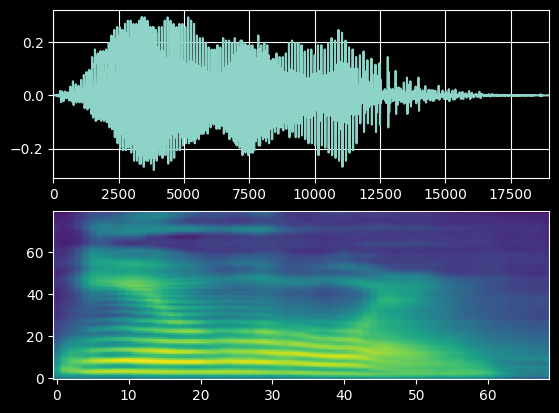

In [23]:
def plot(waveforms, spec, sample_rate):
    waveforms = waveforms.cpu().detach()
    fig, [ax1, ax2] = plt.subplots(2, 1)
    ax1.plot(waveforms[0])
    ax1.set_xlim(0, waveforms.size(-1))
    ax1.grid(True)
    ax2.imshow(spec[0].cpu().detach(), origin="lower", aspect="auto")
    return IPython.display.Audio(waveforms[0:1], rate=sample_rate)


plot(waveforms, spec, vocoder.sample_rate)